<a href="https://colab.research.google.com/github/SaurabhSRP/11-Mushroom-Classification/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
pd.set_option('Display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [50]:
df=pd.read_csv("https://raw.githubusercontent.com/SaurabhSRP/11-Mushroom-Classification/main/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


###This dataset has categorical features only,which requires encoding as we move ahead

###lets understand each categorical features

##**About this file**
###**Attribute Information:** (classes: edible=e, poisonous=p)

###**cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

###**cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s

###**cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

###**bruises:** bruises=t,no=f

###**odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

###**gill-attachment:** attached=a,descending=d,free=f,notched=n

###**gill-spacing:** close=c,crowded=w,distant=d

###**gill-size:** broad=b,narrow=n

###**gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

###**stalk-shape:** enlarging=e,tapering=t

###**stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

###**stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

###**stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

###**stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

###**stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

###**veil-type:** partial=p,universal=u

###**veil-color:** brown=n,orange=o,white=w,yellow=y

###**ring-number:** none=n,one=o,two=t

###**ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

###**spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

###**population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

###**habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [51]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

###We dont have any null values

#**EDA**

<ipython-input-52-a622dbb83a22>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,15))
<ipython-input-52-a622dbb83a22>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,15))
<ipython-input-52-a622dbb83a22>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,15)

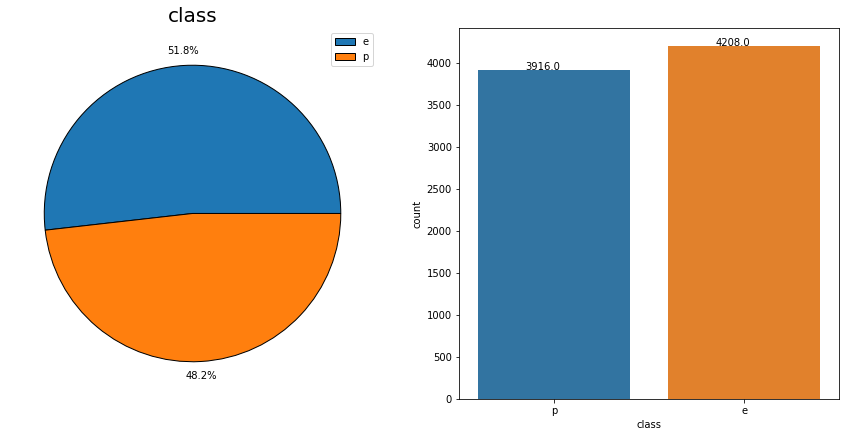

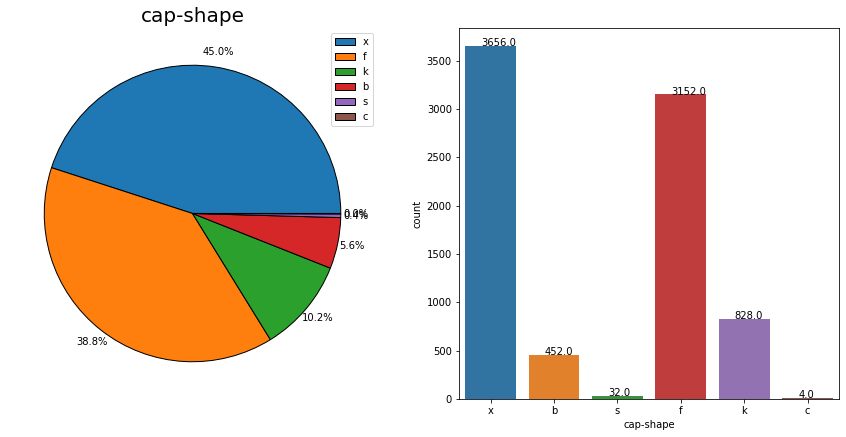

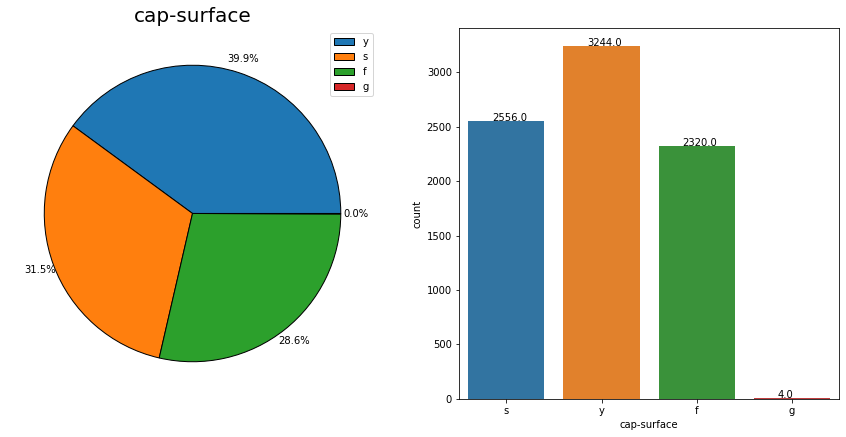

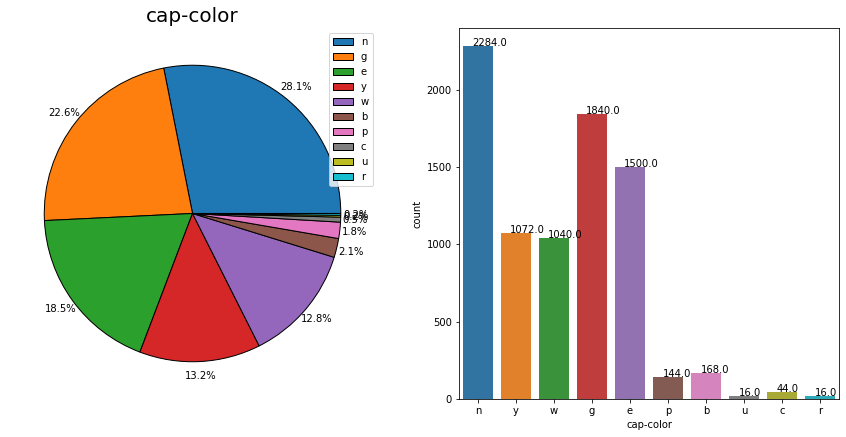

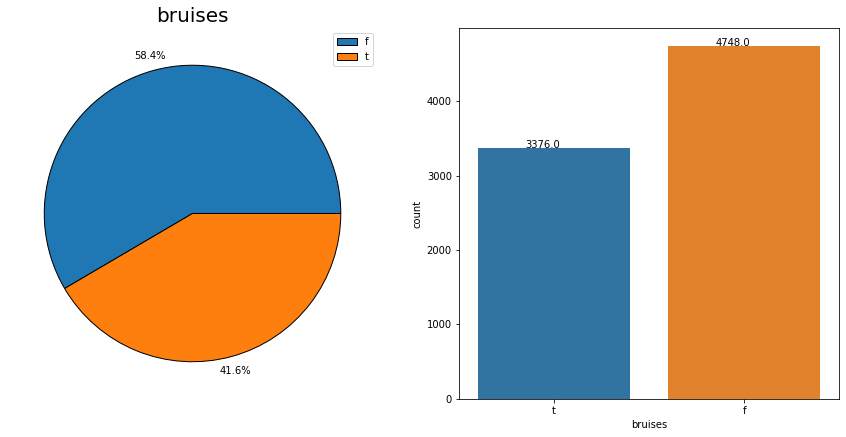

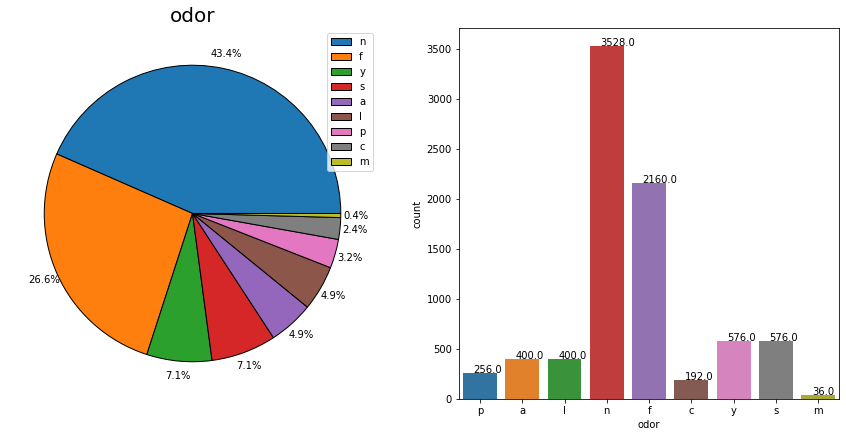

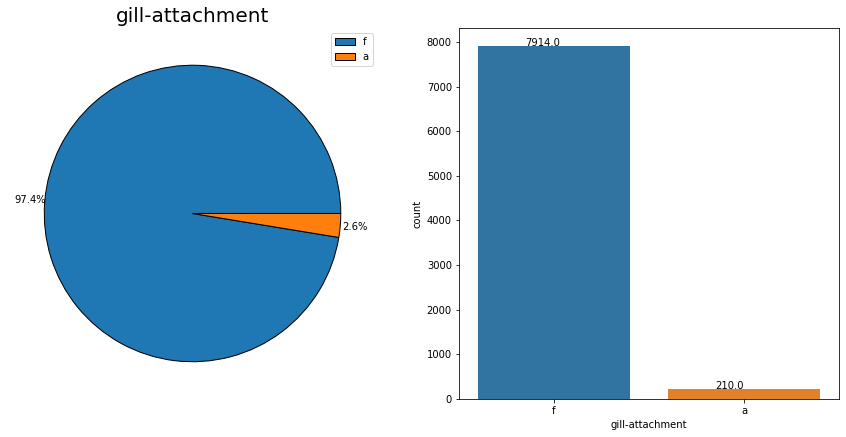

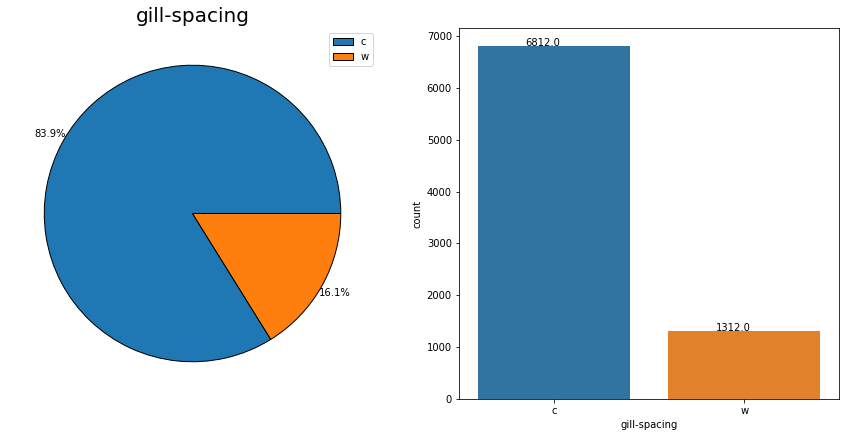

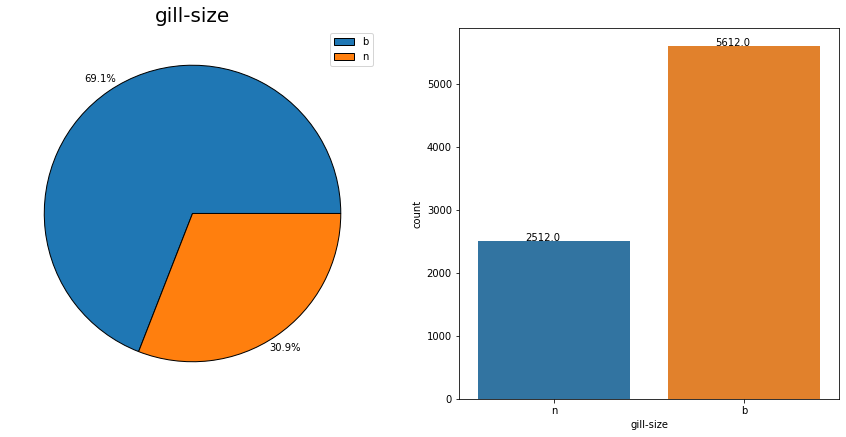

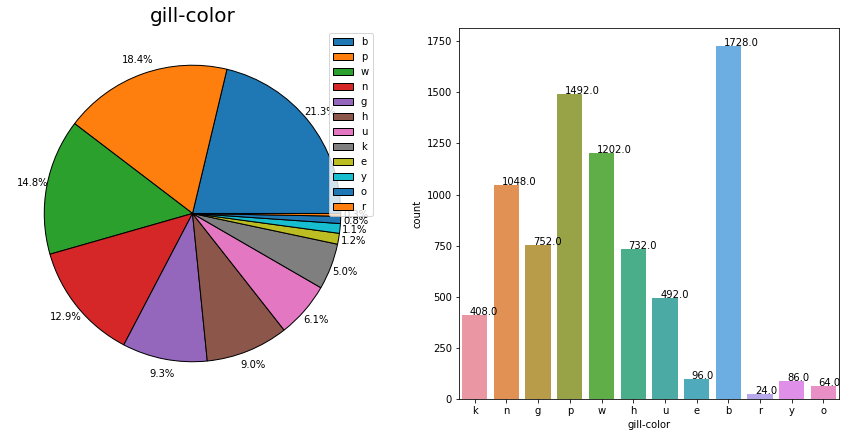

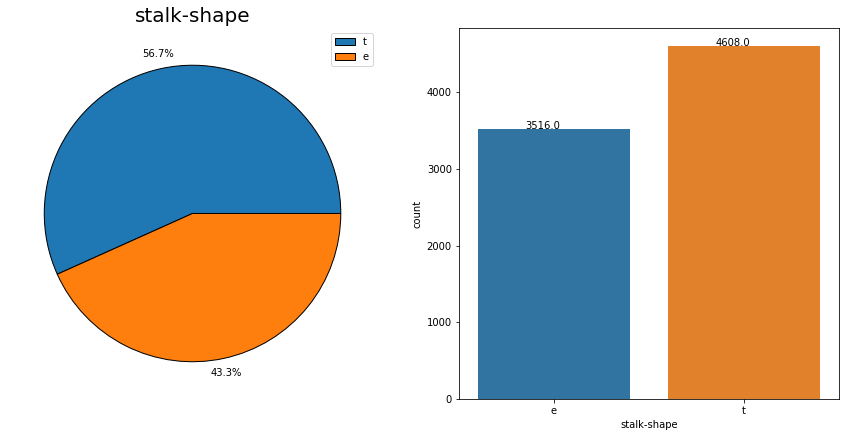

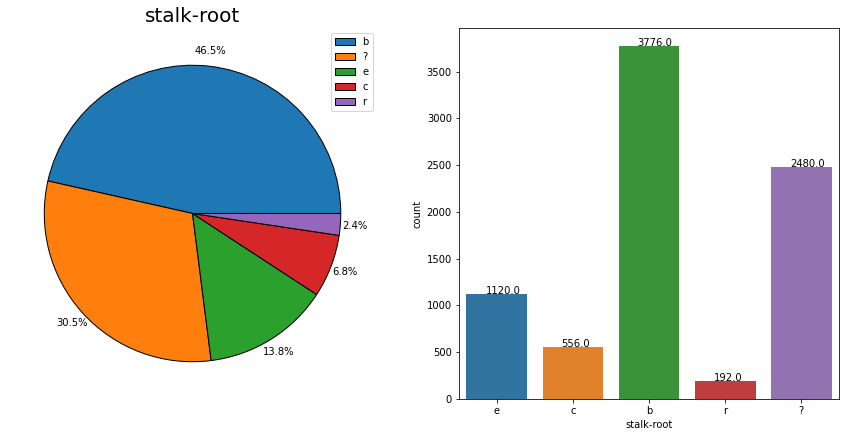

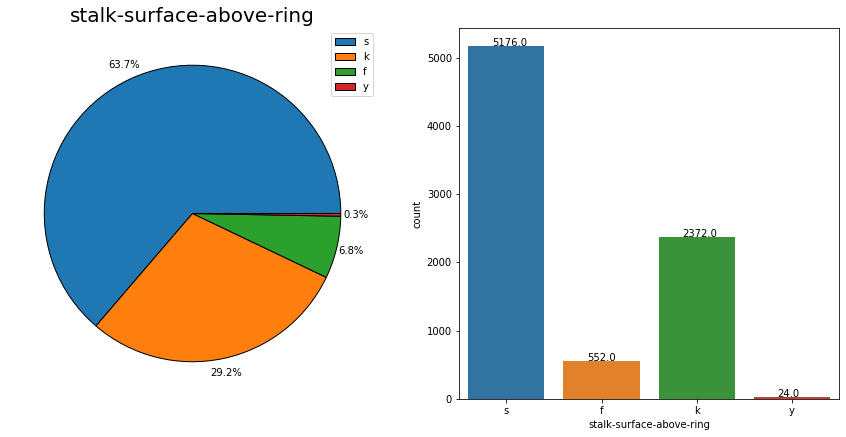

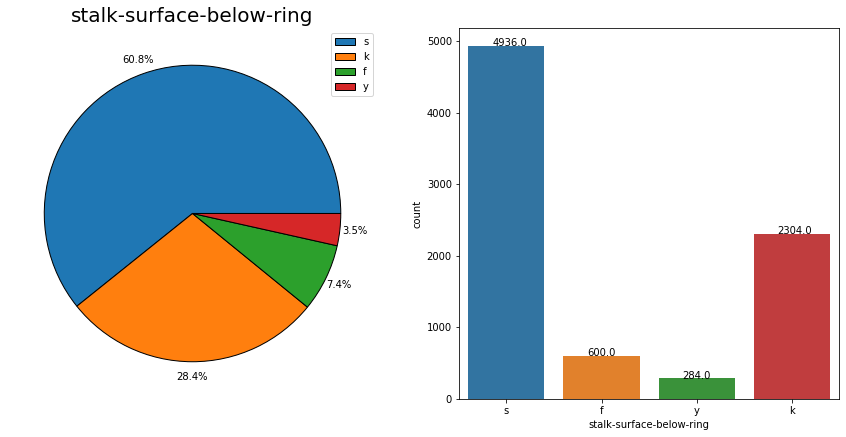

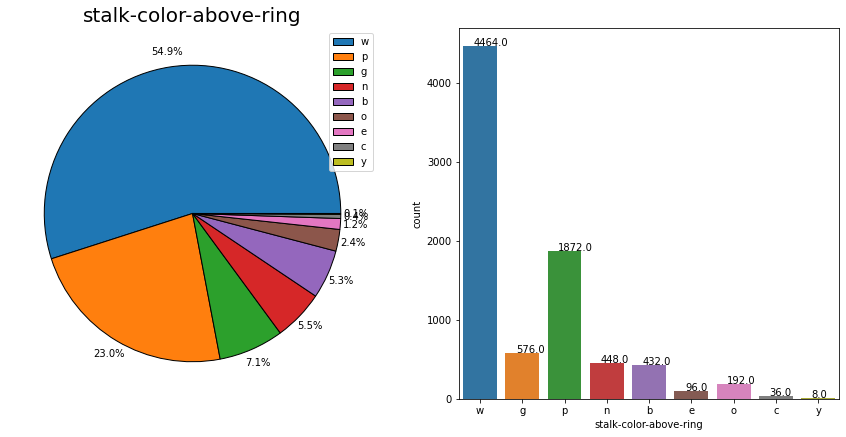

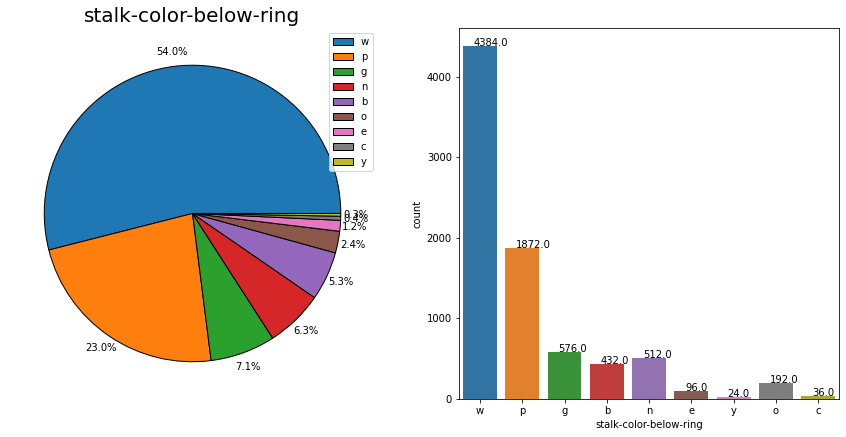

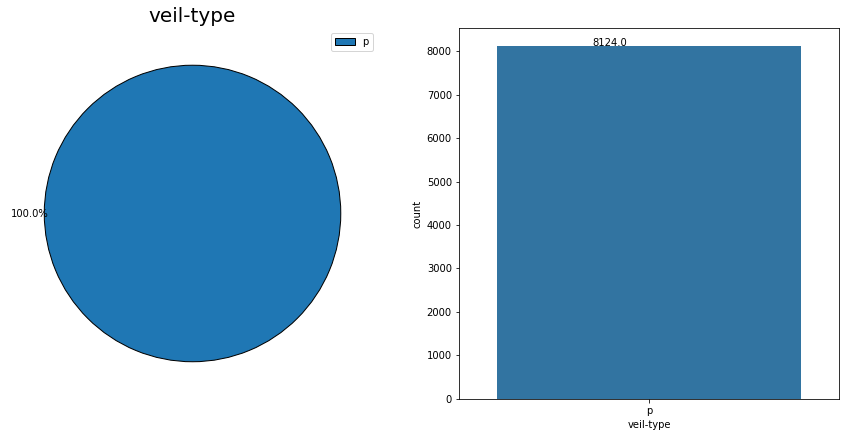

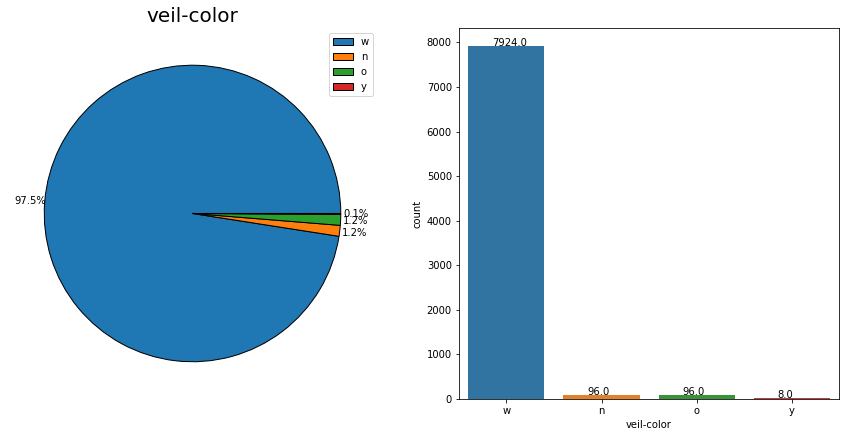

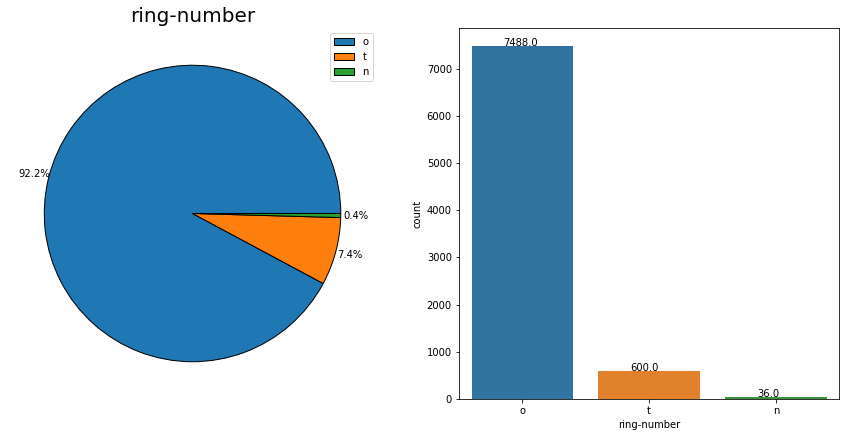

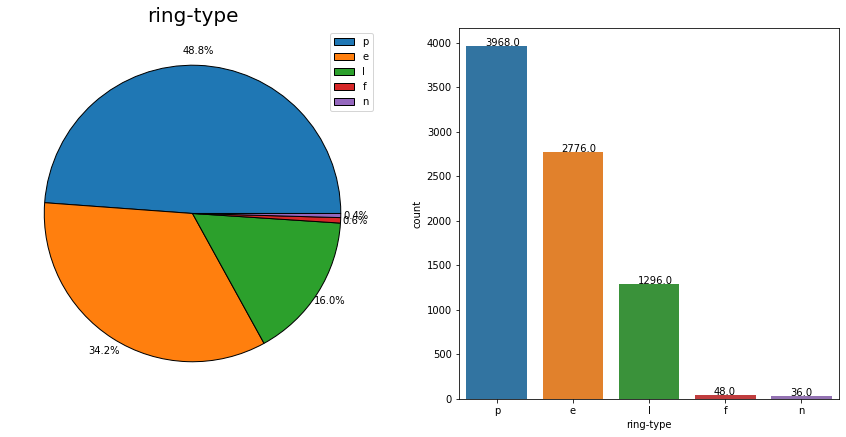

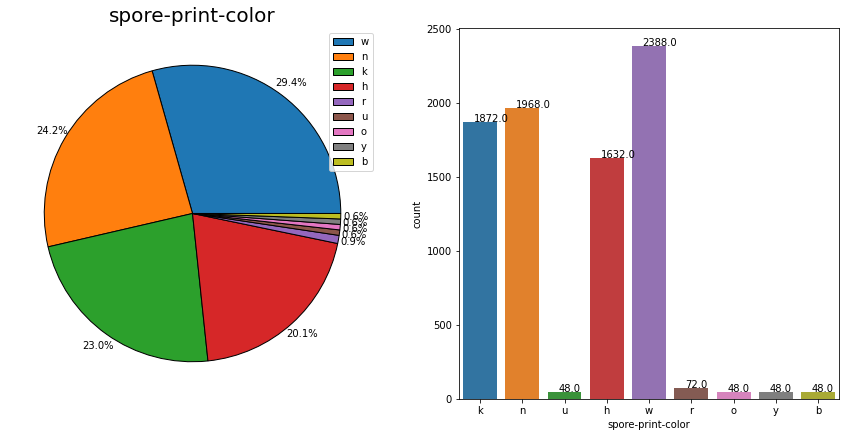

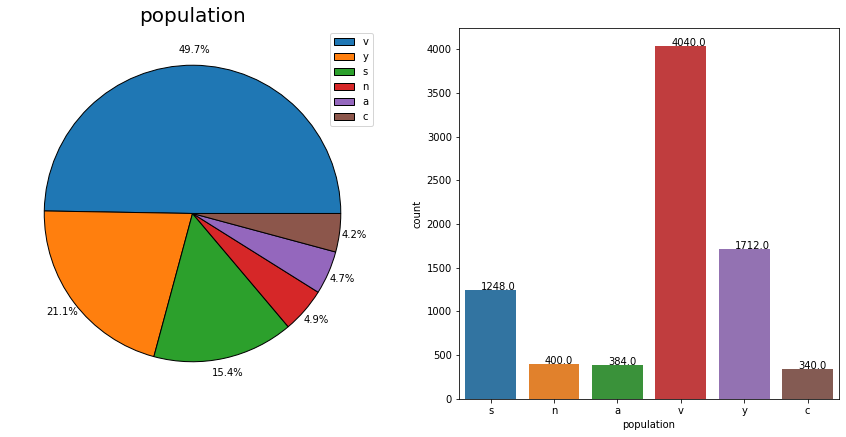

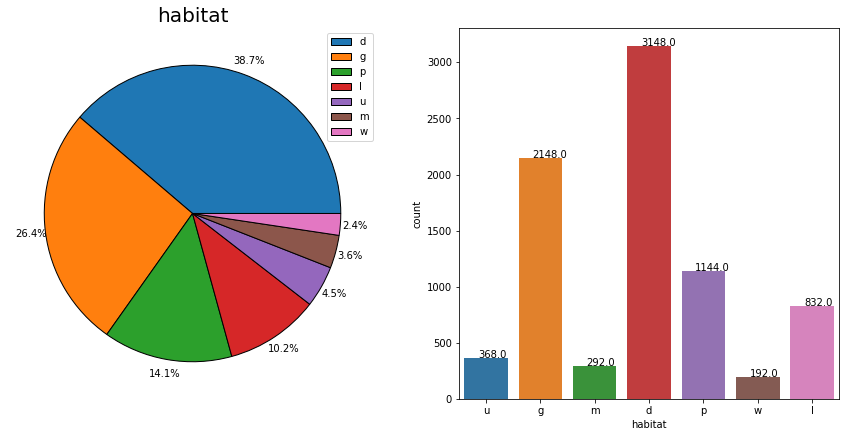

In [52]:
for feature in df.columns:
  plt.figure(figsize=(15,15))
  plt.subplot(2,2,1)
  plt.pie(x=df[feature].value_counts(),autopct='%1.1f%%',pctdistance=1.1,
          wedgeprops={'linewidth':1.0,'edgecolor':'black'},
          textprops={'color':'black','fontsize':10}
          )
  plt.legend(labels=df[feature].value_counts().index,loc=1)
  plt.title(feature,fontsize=20)

  plt.subplot(2,2,2)
  ax=sns.countplot(x=df[feature])
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

##Observation:

###1) we can remove the veil-type column as this has only one entry

###2)**Ideally** - many categories in a feature has less than 100 counts of the feature , we can act as rare variable..so in ideal situation we remove it but in our model we will keep as it is 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

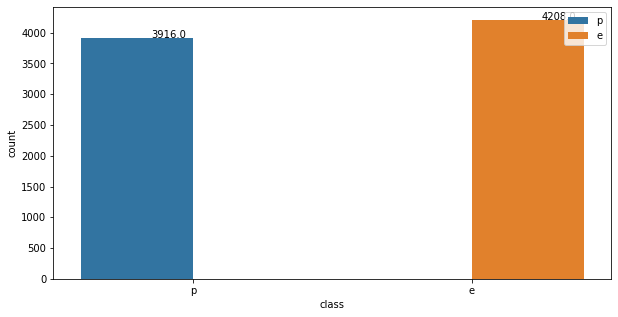

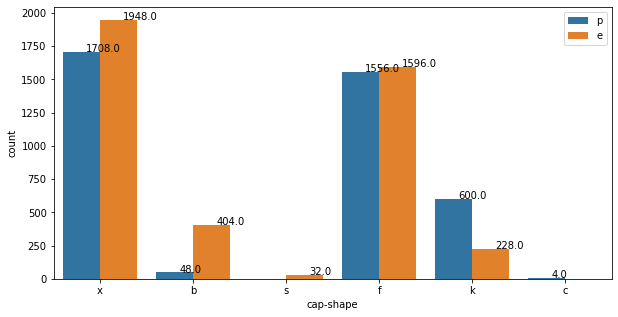

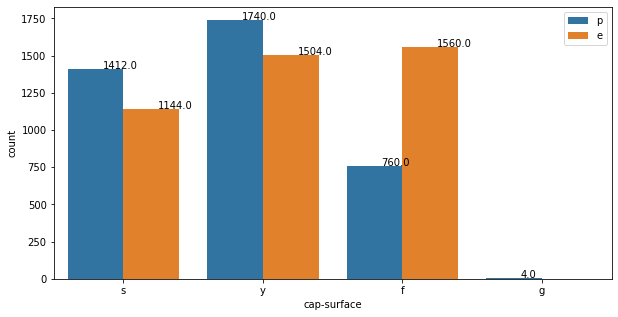

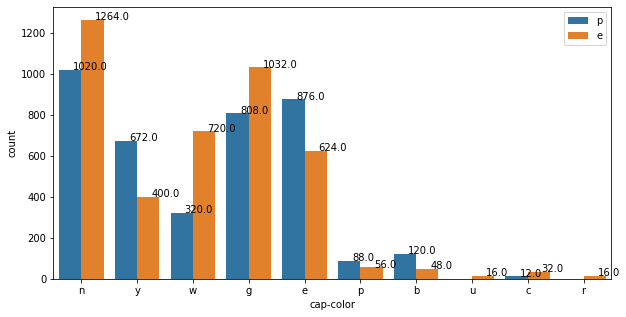

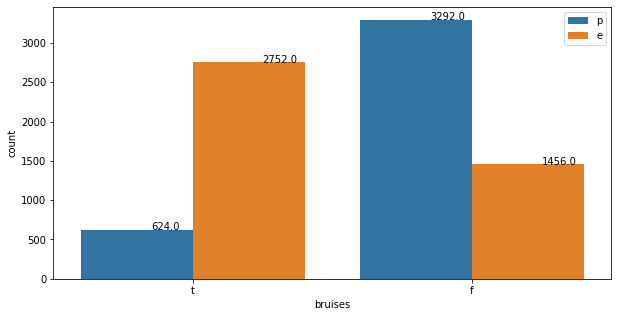

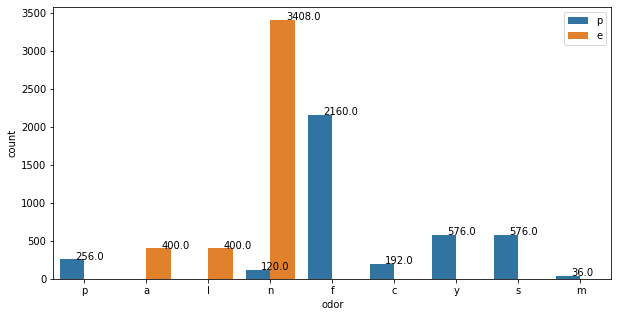

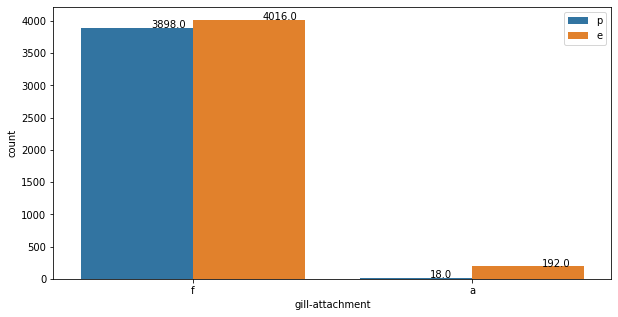

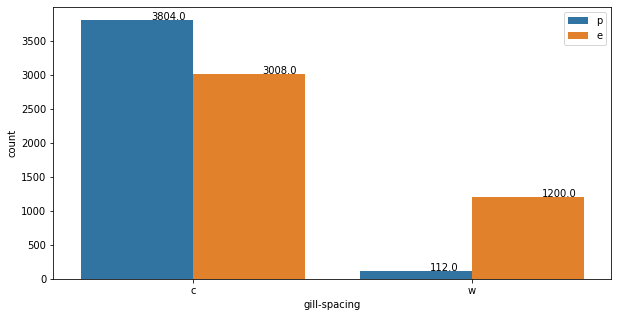

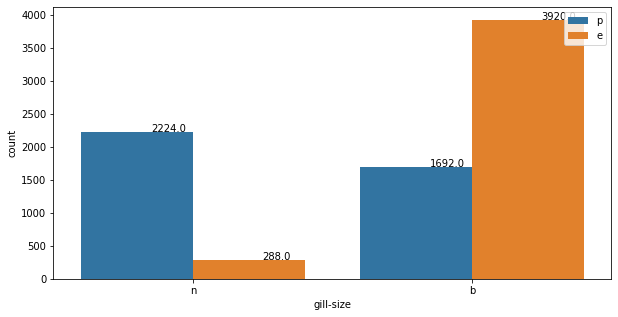

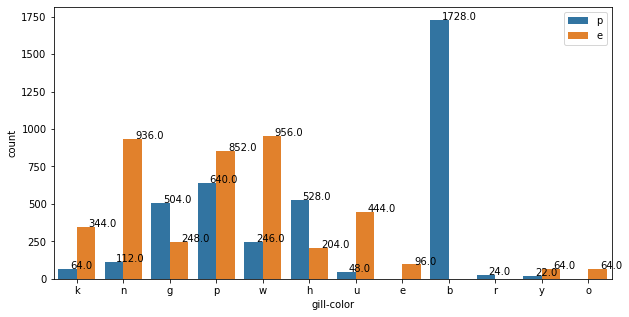

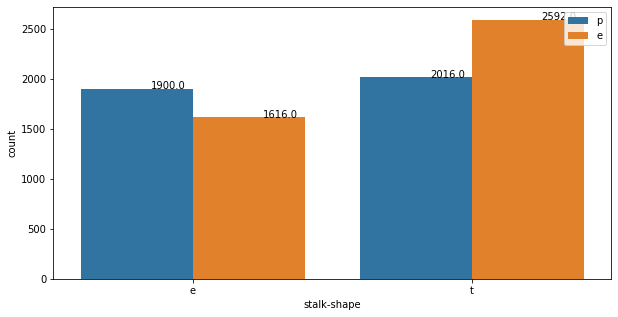

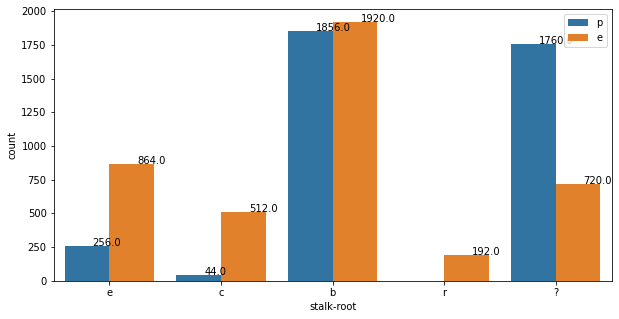

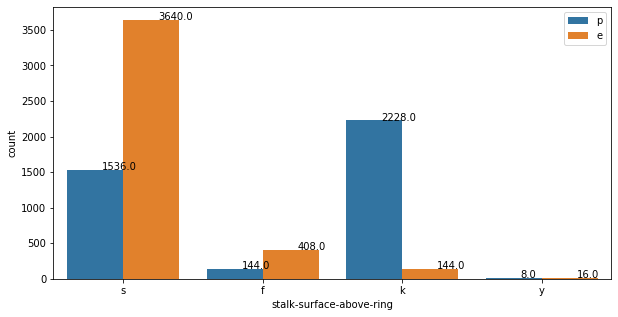

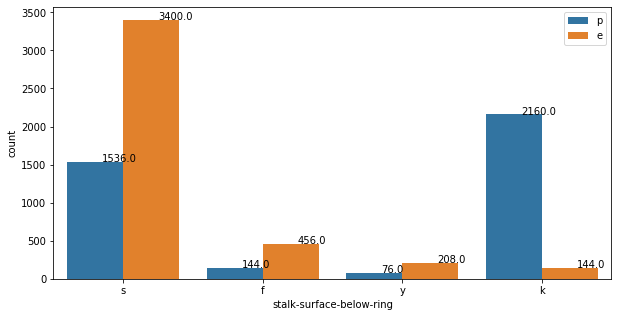

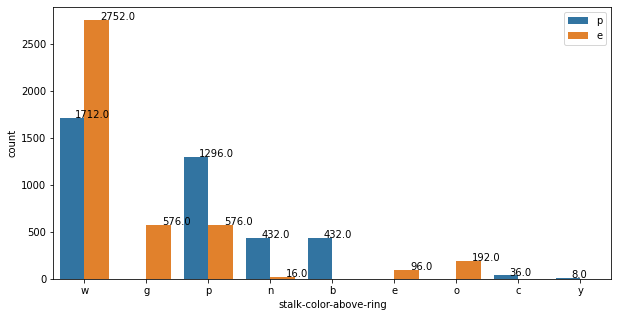

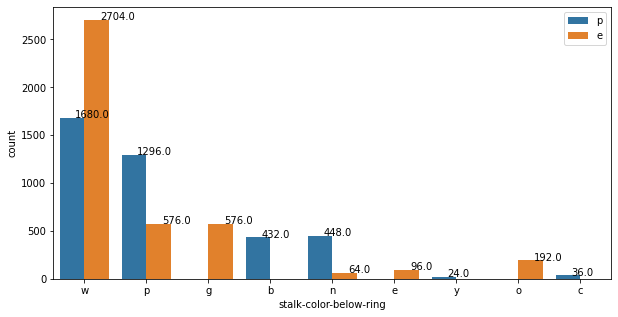

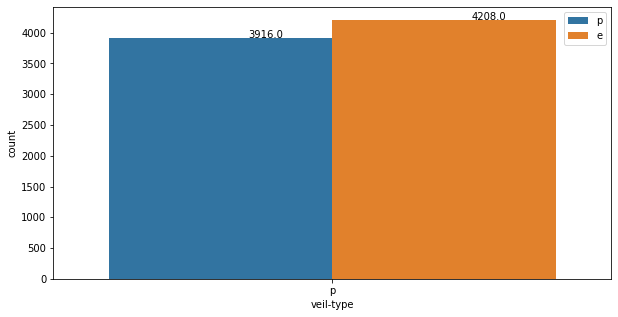

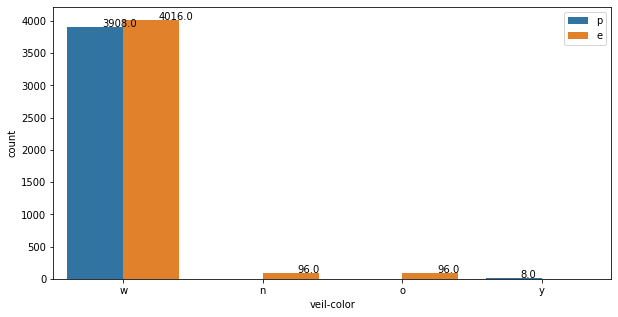

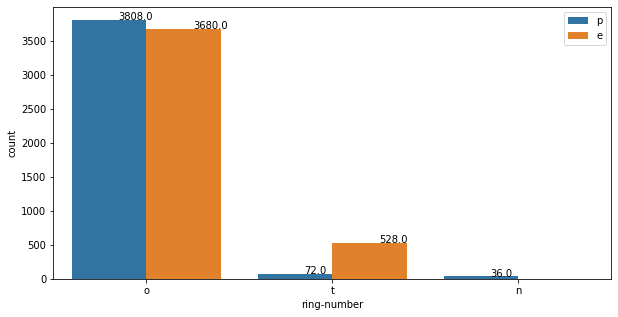

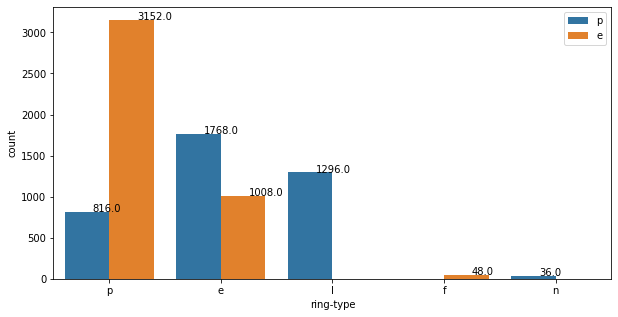

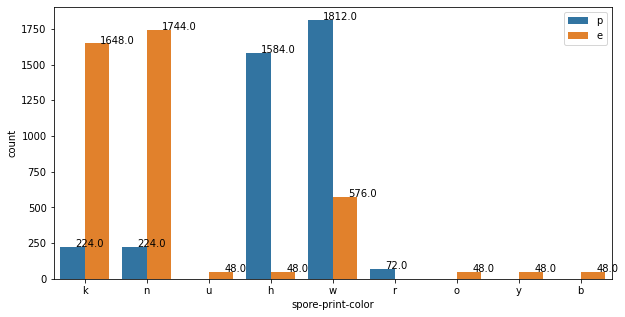

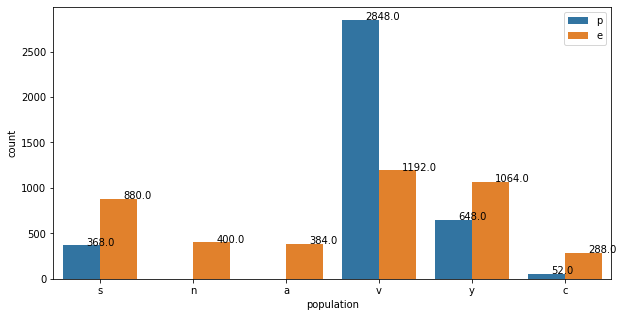

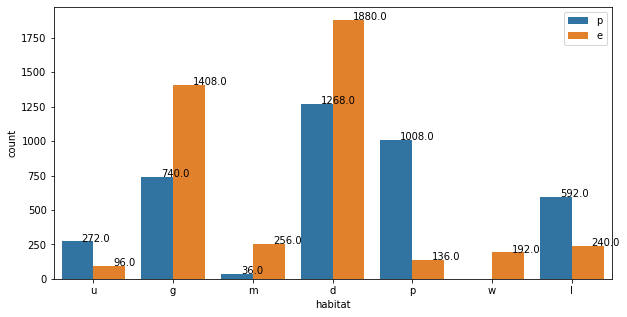

In [53]:
for feature in df.columns:
  plt.figure(figsize=(10,5))
  ax=sns.countplot(df[feature],hue="class",data=df)
  plt.legend(loc=1)

  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

###Dropping veil-type column

In [57]:
df.drop("veil-type",axis=1,inplace=True)

#**Encoding all features**

In [68]:
for feature in df.columns:
  labels_ordered=df.groupby([feature]).mean().index
  labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
  df[feature]=df[feature].map(labels_ordered)

In [71]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


#**Train test split**

In [75]:
X=df.drop("class",axis=1)
y=df["class"]

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

#**Scaling of data**

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [82]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#**Classification Algorithm**

##**Decision Tree Classifier**

In [85]:
model_dectree=dectree.fit(X_train_scaled,y_train)

In [86]:
pred_dectree=model_dectree.predict(X_test_scaled)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       1.00      1.00      1.00      1162

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



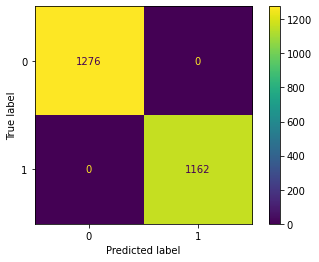

In [98]:
print(accuracy_score(y_test,pred_dectree))
print(classification_report(y_test,pred_dectree))
ConfusionMatrixDisplay.from_estimator(model_dectree,X_test_scaled,y_test)

In [103]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred_dectree)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

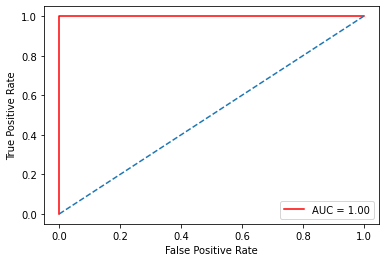

In [104]:
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

##**Naive Bayes**

In [109]:
model_nb=nb.fit(X_train_scaled,y_train)

In [110]:
pred_nb=model_nb.predict(X_test_scaled)

0.9224774405250205
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1276
           1       0.92      0.92      0.92      1162

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



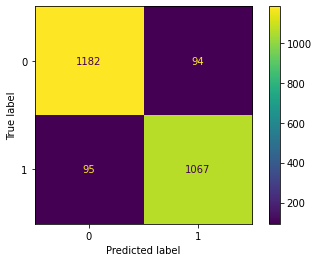

In [111]:
print(accuracy_score(y_test,pred_nb))
print(classification_report(y_test,pred_nb))
ConfusionMatrixDisplay.from_estimator(model_nb,X_test_scaled,y_test)

In [112]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred_nb)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9222883472987337

Text(0.5, 0, 'False Positive Rate')

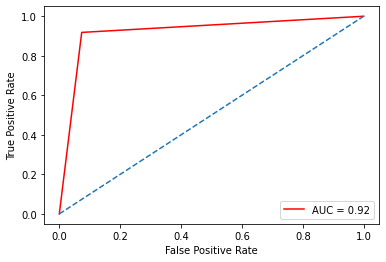

In [113]:
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###Seems like Decision Tree Algorithm is making accurate prediction so it is the best algorithm to use or any algorithm which uses DecisionTree method 

###Hope you liked this excercise